In [2]:
import pickle
import numpy as np
np.random.seed(5)
import pandas as pd
import tensorflow as tf


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
labels = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","space"]

In [ ]:
import tensorflow as tf

# Set the container path
container_path = 'update correct path where data is'
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    container_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(200, 200),
    batch_size=32,
   
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    container_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(200, 200),
    batch_size=32,
     
)

Found 27000 files belonging to 27 classes.
Using 21600 files for training.
Found 27000 files belonging to 27 classes.
Using 5400 files for validation.


In [ ]:

def dataset_to_numpy(dataset):
    # unbatch the dataset by iterating through it and collecting the images and labels
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())  # convert image batch to numpy array
        labels.append(label_batch.numpy())  # convert label batch to numpy array

    # stack images and labels to get one numpy array each
    images = np.vstack(images)
    labels = np.hstack(labels)

    return images, labels

# Get training and validation data
x_train, y_train = dataset_to_numpy(train_ds)
x_test, y_test = dataset_to_numpy(val_ds)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_test.shape}")
print(f"y_val shape: {y_test.shape}")

x_train shape: (21600, 200, 200, 3)
y_train shape: (21600,)
x_val shape: (5400, 200, 200, 3)
y_val shape: (5400,)


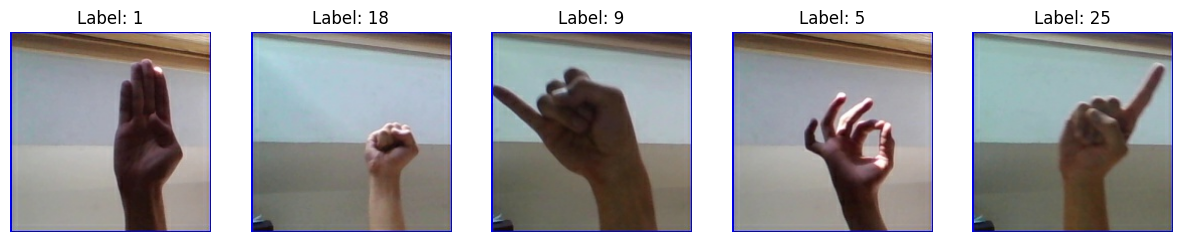

In [ ]:
import matplotlib.pyplot as plt

# displays images to check
num_images_to_show = 5  

plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow((x_train[i]).astype("uint8"))  
    plt.axis('off') 
    plt.title(f"Label: {y_train[i]}")

plt.show()


In [12]:
print("Train/test samples per class:")
for i, label in enumerate(labels):
    num_train = sum(y_train==i)
    num_test = sum(y_test==i)
    print(f"{label}: {num_train} / {num_test} = {round(num_train/num_test, 2)}")

Train/test samples per class:
A: 824 / 176 = 4.68
B: 808 / 192 = 4.21
C: 809 / 191 = 4.24
D: 789 / 211 = 3.74
E: 795 / 205 = 3.88
F: 802 / 198 = 4.05
G: 803 / 197 = 4.08
H: 792 / 208 = 3.81
I: 816 / 184 = 4.43
J: 788 / 212 = 3.72
K: 806 / 194 = 4.15
L: 811 / 189 = 4.29
M: 815 / 185 = 4.41
N: 793 / 207 = 3.83
O: 797 / 203 = 3.93
P: 810 / 190 = 4.26
Q: 788 / 212 = 3.72
R: 779 / 221 = 3.52
S: 793 / 207 = 3.83
T: 793 / 207 = 3.83
U: 786 / 214 = 3.67
V: 808 / 192 = 4.21
W: 805 / 195 = 4.13
X: 791 / 209 = 3.78
Y: 804 / 196 = 4.1
Z: 798 / 202 = 3.95
space: 797 / 203 = 3.93


In [ ]:
import tensorflow as tf

# one-hot encode the labels and check shape
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))

print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")


y_train_encoded shape: (21600, 27)
y_test_encoded shape: (5400, 27)


In [ ]:
# print first few encoded labels for verification
print("First few y_train_encoded labels:")
print(y_train_encoded[:5]) 


First few y_train_encoded labels:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0.]]


In [ ]:
import numpy as np

# check one hot encoded vectors
for i in range(5): 
    one_hot_vector = y_train_encoded[i]
    label_index = np.argmax(one_hot_vector)
    print(f"One-hot encoded vector {i}: {one_hot_vector}")
    print(f"Decoded label index: {label_index} -> Class: {labels[label_index]}")
    print('-' * 50)

One-hot encoded vector 0: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
Decoded label index: 1 -> Class: B
--------------------------------------------------
One-hot encoded vector 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0.]
Decoded label index: 18 -> Class: S
--------------------------------------------------
One-hot encoded vector 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
Decoded label index: 9 -> Class: J
--------------------------------------------------
One-hot encoded vector 3: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
Decoded label index: 5 -> Class: F
--------------------------------------------------
One-hot encoded vector 4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.]
Decoded label index: 25 -> Class: Z
--------------------------------------------------


In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Reshape, Conv2DTranspose
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

#cnn model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(labels), activation='softmax')  # `labels` is your class list
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

hist = model.fit(x_train,
                 y_train_encoded,
                 epochs=10,
                 validation_split=0.2,
                 batch_size=32,
                 shuffle=True,
                 callbacks=[early_stop])



# Save the model
model.save('alphabet_model_1.h5')



Epoch 1/10
540/540 [==============================] - 326s 601ms/step - loss: 5.4330 - accuracy: 0.6696 - val_loss: 0.2698 - val_accuracy: 0.9317
Epoch 2/10
540/540 [==============================] - 343s 635ms/step - loss: 0.2991 - accuracy: 0.9506 - val_loss: 0.0770 - val_accuracy: 0.9794
Epoch 3/10
540/540 [==============================] - 334s 619ms/step - loss: 0.1582 - accuracy: 0.9757 - val_loss: 0.0739 - val_accuracy: 0.9861
Epoch 4/10
540/540 [==============================] - 347s 642ms/step - loss: 0.2350 - accuracy: 0.9808 - val_loss: 0.2449 - val_accuracy: 0.9720
Epoch 5/10
540/540 [==============================] - 363s 671ms/step - loss: 0.1850 - accuracy: 0.9872 - val_loss: 0.1306 - val_accuracy: 0.9854
Epoch 6/10
540/540 [==============================] - 359s 665ms/step - loss: 0.1299 - accuracy: 0.9895 - val_loss: 0.1299 - val_accuracy: 0.9803
Epoch 6: early stopping


c:\Users\shaga\miniconda3\envs\mediapipe-env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


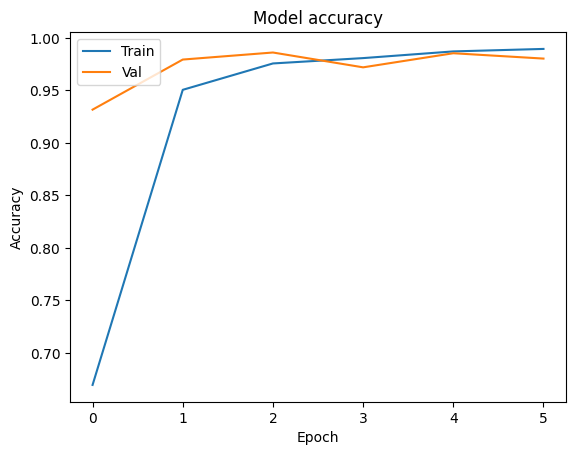

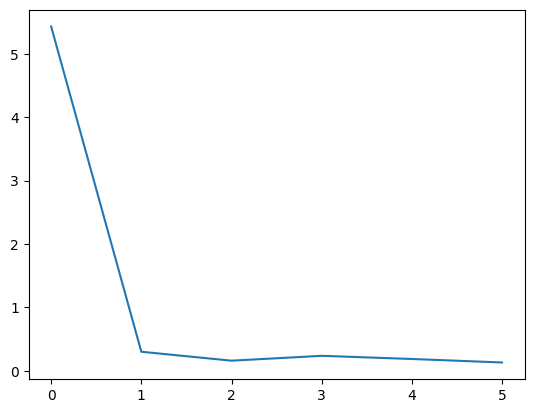

In [ ]:
import matplotlib.pyplot as plt

# plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(hist.history['loss'])

Inceptionv3

In [ ]:
import tensorflow as tf

container_path = 'update correct path where data is'

train_ds = tf.keras.utils.image_dataset_from_directory(
    container_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(200, 200),
    batch_size=32,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    container_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(200, 200),
    batch_size=32,
)

Found 27000 files belonging to 27 classes.
Using 21600 files for training.
Found 27000 files belonging to 27 classes.
Using 5400 files for validation.


In [ ]:

def dataset_to_numpy(dataset):
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())  
        labels.append(label_batch.numpy())  
    images = np.vstack(images)
    labels = np.hstack(labels)

    return images, labels

x_train, y_train = dataset_to_numpy(train_ds)
x_test, y_test = dataset_to_numpy(val_ds)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_test.shape}")
print(f"y_val shape: {y_test.shape}")

x_train shape: (21600, 200, 200, 3)
y_train shape: (21600,)
x_val shape: (5400, 200, 200, 3)
y_val shape: (5400,)


In [ ]:
import tensorflow as tf

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))

print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")


y_train_encoded shape: (21600, 27)
y_test_encoded shape: (5400, 27)


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

input_shape = (200, 200, 3)  
def create_inceptionv3_model(input_shape, num_classes=27):
    # load the InceptionV3 model with pre-trained weights (ImageNet) but without the classfication layer
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freezes the base model layers to prevent them from being updated during training
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,  
        layers.GlobalAveragePooling2D(),  
        layers.Dense(128, activation='relu'),  
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = create_inceptionv3_model(input_shape=input_shape, num_classes=27)

#summary of model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 27)                3483      
                                                                 
Total params: 22068539 (84.18 MB)
Trainable params: 265755 (1.01 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
hist = model.fit(x_train,
                 y_train_encoded,
                 epochs=10,
                 validation_split=0.2,
                 batch_size=64,
                 shuffle=True,
                 callbacks=[early_stop])


model.save('alphabet_model_inception.h5')

Epoch 1/10
270/270 [==============================] - 236s 860ms/step - loss: 5.3981 - accuracy: 0.1356 - val_loss: 2.5222 - val_accuracy: 0.2676
Epoch 2/10
270/270 [==============================] - 222s 822ms/step - loss: 1.9958 - accuracy: 0.4182 - val_loss: 1.5401 - val_accuracy: 0.5456
Epoch 3/10
270/270 [==============================] - 218s 808ms/step - loss: 1.2275 - accuracy: 0.6215 - val_loss: 0.9280 - val_accuracy: 0.7106
Epoch 4/10
270/270 [==============================] - 215s 797ms/step - loss: 0.8774 - accuracy: 0.7130 - val_loss: 0.8517 - val_accuracy: 0.7118
Epoch 5/10
270/270 [==============================] - 220s 814ms/step - loss: 0.5887 - accuracy: 0.8032 - val_loss: 0.4888 - val_accuracy: 0.8340
Epoch 6/10
270/270 [==============================] - 226s 836ms/step - loss: 0.4930 - accuracy: 0.8359 - val_loss: 0.5183 - val_accuracy: 0.8192
Epoch 7/10
270/270 [==============================] - 214s 792ms/step - loss: 0.3629 - accuracy: 0.8789 - val_loss: 0.2947 -

c:\Users\shaga\miniconda3\envs\mediapipe-env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


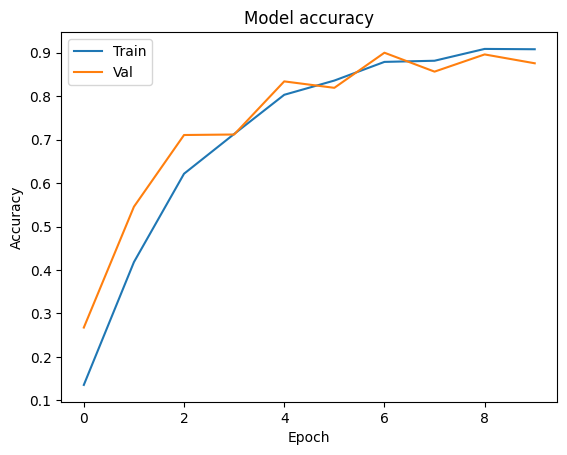

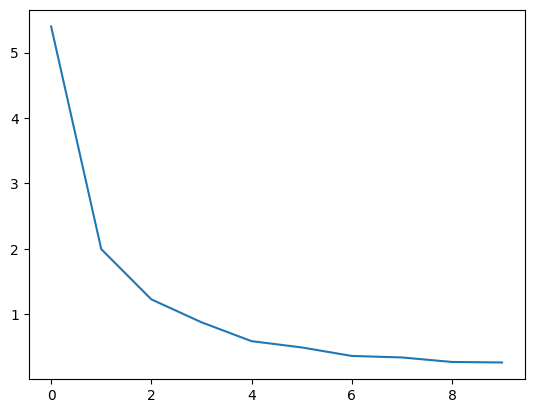

In [ ]:
import matplotlib.pyplot as plt

# plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(hist.history['loss'])

Media Pipe

In [ ]:
import os
import cv2
import mediapipe as mp
import pickle

# initializes mediapipe hadns modueles
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

container_path = 'update correct path where alphabet data is'

# labels 
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", 
          "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "space"]

# data to hold the landmarks and their labels
data = []
labels_list = []

# loop through each label folder in the dataset
for label in labels:
    label_folder = os.path.join(container_path, label)
    
    # loop through each image in the current folder
    for img_name in os.listdir(label_folder):
        img_path = os.path.join(label_folder, img_name)
        
        # reads and process the image
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converts image to rgb

        # processes the image to find hand landmarks
        results = hands.process(img_rgb)

        # if hand landmarks are found, this will store them
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                landmarks = []  # holds the x and y coordinates of the landmarks
                for landmark in hand_landmarks.landmark:
                    x = landmark.x
                    y = landmark.y
                    landmarks.append((x, y))

                # flattens the landmarks and adds them to the data list
                data.append([coord for landmark in landmarks for coord in landmark])  # these are the flattened x and y coords
                labels_list.append(label)  # adds the corresponding label
                
# saves the extracted data and labels to a pickle file
with open('hand_landmarks_data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels_list}, f)

print("Landmarks extraction and saving completed.")


Landmarks extraction and saving completed.


In [ ]:
import pickle

# Loads the previous pickle file
with open('hand_landmarks_data.pickle', 'rb') as f:
    data_dict = pickle.load(f)

# extracts data and labels
data = data_dict['data']
labels = data_dict['labels']

# inspection of data and their labels
for i in range(5):
    print(f"Sample {i + 1}:")
    print("Landmarks:", data[i]) 
    print("Label:", labels[i])  
    print()

print(f"Total number of samples: {len(data)}")


Sample 1:
Landmarks: [0.455066442489624, 0.5836992263793945, 0.5698685050010681, 0.5073082447052002, 0.6398922801017761, 0.3747640550136566, 0.6519050002098083, 0.26375892758369446, 0.634507417678833, 0.17856496572494507, 0.5469140410423279, 0.27190926671028137, 0.5879605412483215, 0.20942577719688416, 0.5947834253311157, 0.3083217740058899, 0.5935064554214478, 0.39404019713401794, 0.46896305680274963, 0.28277862071990967, 0.5208632946014404, 0.23336049914360046, 0.5325977206230164, 0.3514549732208252, 0.5363203287124634, 0.4403606653213501, 0.3963375389575958, 0.30429989099502563, 0.4590957462787628, 0.2937459945678711, 0.47036412358283997, 0.4047185182571411, 0.46935874223709106, 0.4760768413543701, 0.32491159439086914, 0.33462393283843994, 0.3918014168739319, 0.32344919443130493, 0.40498092770576477, 0.40884846448898315, 0.4034108519554138, 0.4611509442329407]
Label: A

Sample 2:
Landmarks: [0.48467499017715454, 0.6141616106033325, 0.6021450161933899, 0.5439119338989258, 0.676195383

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# loads the data and labels from the pickle file
import pickle
with open('hand_landmarks_data.pickle', 'rb') as f:
    dataset = pickle.load(f)

data = np.array(dataset['data'])
labels = dataset['labels']

#Label encoding for categorical labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)  # convert labels to integers 

#  data normalisation
data_normalized = data / np.max(data)

# data split 80 , 20
x_train, x_val, y_train, y_val = train_test_split(data_normalized, labels_encoded, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(42,)),  # Input layer for 42 features (flattened landmarks)
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    tf.keras.layers.Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    tf.keras.layers.Dense(27, activation='softmax')  # Output layer for 26 classes (A-Z)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Sparse because labels are integers
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

# save model
model.save('Mediapipe_Alphabet.h5')

# evaluation
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")



Epoch 1/20
1631/1631 [==============================] - 3s 1ms/step - loss: 1.1549 - accuracy: 0.7098 - val_loss: 0.5188 - val_accuracy: 0.8932
Epoch 2/20
1631/1631 [==============================] - 2s 1ms/step - loss: 0.4257 - accuracy: 0.9021 - val_loss: 0.3265 - val_accuracy: 0.9377
Epoch 3/20
1631/1631 [==============================] - 2s 1ms/step - loss: 0.2924 - accuracy: 0.9372 - val_loss: 0.2407 - val_accuracy: 0.9467
Epoch 4/20
1631/1631 [==============================] - 2s 1ms/step - loss: 0.2193 - accuracy: 0.9551 - val_loss: 0.2208 - val_accuracy: 0.9483
Epoch 5/20
1631/1631 [==============================] - 2s 1ms/step - loss: 0.1838 - accuracy: 0.9610 - val_loss: 0.1872 - val_accuracy: 0.9472
Epoch 6/20
1631/1631 [==============================] - 2s 1ms/step - loss: 0.1594 - accuracy: 0.9651 - val_loss: 0.1466 - val_accuracy: 0.9667
Epoch 7/20
1631/1631 [==============================] - 2s 1ms/step - loss: 0.1429 - accuracy: 0.9677 - val_loss: 0.1286 - val_accuracy:

c:\Users\shaga\miniconda3\envs\mediapipe-env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


408/408 [==============================] - 0s 843us/step - loss: 0.0777 - accuracy: 0.9798
Validation Accuracy: 97.98%


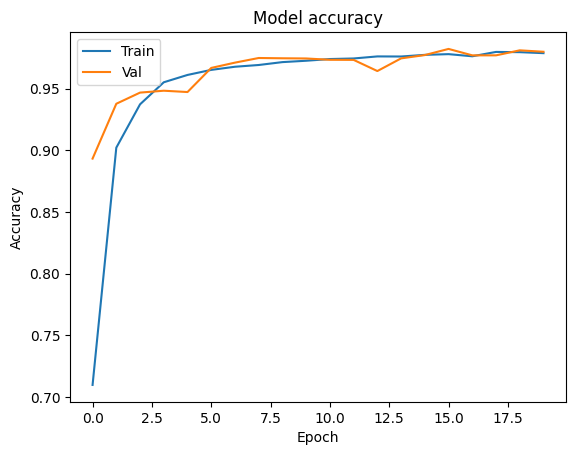

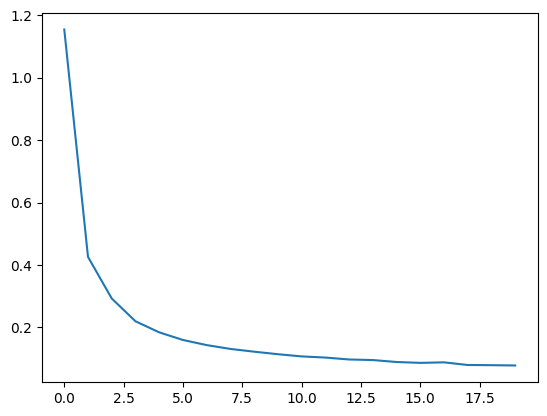

In [ ]:
import matplotlib.pyplot as plt

# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])

Evaluation CNN For Alphabet Results

In [ ]:
def dataset_to_numpy(dataset):
    # convert dataset to numpy arrays
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(label_batch.numpy())

    # stacks images and labels
    images = np.vstack(images)
    labels = np.hstack(labels)

    return images, labels

# get test data from the validation dataset
x_test, y_test = dataset_to_numpy(val_ds)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_test shape: (16200, 200, 200, 3)
y_test shape: (16200,)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

model = tf.keras.models.load_model("alphabet_model_1.h5")

# get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# generate classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

# save the report
with open("classification_report_CNN.txt", "w") as f:
    f.write(report)


507/507 [==============================] - 53s 104ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.4863    0.4726    0.4794       639
           1     0.1149    0.4703    0.1846       606
           2     0.6199    0.4597    0.5279       596
           3     0.8679    0.4537    0.5959       637
           4     0.5629    0.4407    0.4944       599
           5     0.6279    0.6437    0.6357       595
           6     0.0957    0.9048    0.1732       599
           7     0.8655    0.3108    0.4573       621
           8     0.8561    0.3805    0.5268       594
           9     0.9245    0.3463    0.5039       566
          10     0.6396    0.5667    0.6009       570
          11     0.6548    0.4743    0.5501       584
          12     0.8354    0.3251    0.4681       609
          13     0.8059    0.3091    0.4468       618
          14     0.9231    0.3132    0.4677       613
          15     0.7571    0.4402    0.5567       602

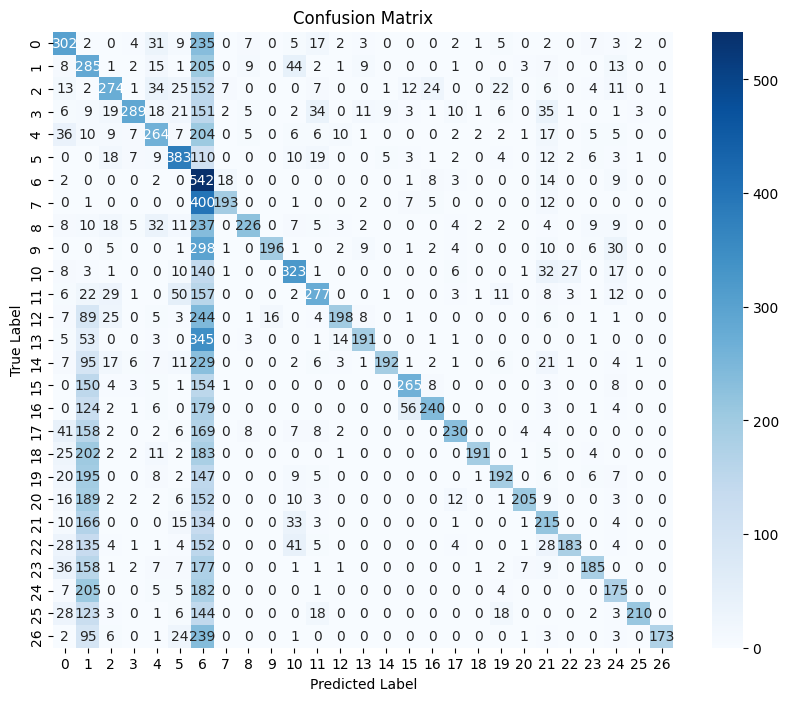

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# create and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB dat

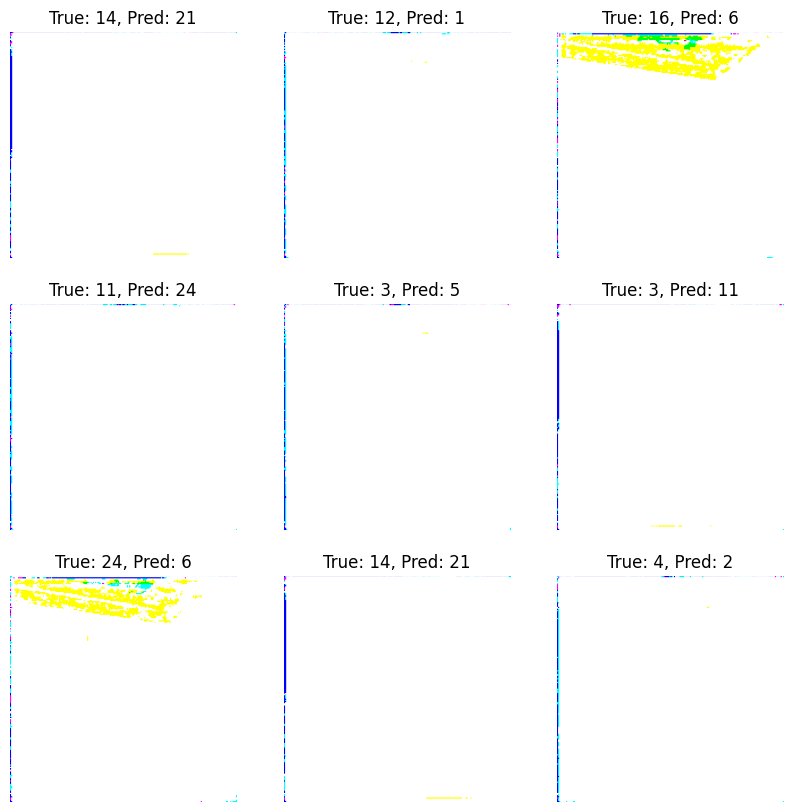

In [ ]:
# identify misclassified indices
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# visualize some misclassified examples
num_examples = min(9, len(misclassified_indices))  # Show up to 9 examples

plt.figure(figsize=(10, 10))

for i, idx in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")  # Adjust if using RGB images
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis("off")

plt.show()


Alphabet InceptionV3 Results

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

model = tf.keras.models.load_model("alphabet_model_inception.h5")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

with open("classification_report_Inception.txt", "w") as f:
    f.write(report)

507/507 [==============================] - 189s 369ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.5544    0.3349    0.4176       639
           1     0.2126    0.4406    0.2868       606
           2     0.1764    0.5520    0.2674       596
           3     0.5000    0.5604    0.5285       637
           4     0.1749    0.3890    0.2413       599
           5     0.2319    0.5664    0.3291       595
           6     0.1441    0.4841    0.2221       599
           7     0.4033    0.4734    0.4356       621
           8     0.8022    0.3754    0.5115       594
           9     0.6156    0.4187    0.4984       566
          10     0.5496    0.3789    0.4486       570
          11     0.6881    0.3664    0.4782       584
          12     0.6318    0.2677    0.3760       609
          13     0.2580    0.3544    0.2986       618
          14     0.4903    0.3703    0.4219       613
          15     0.2265    0.3887    0.2862       60

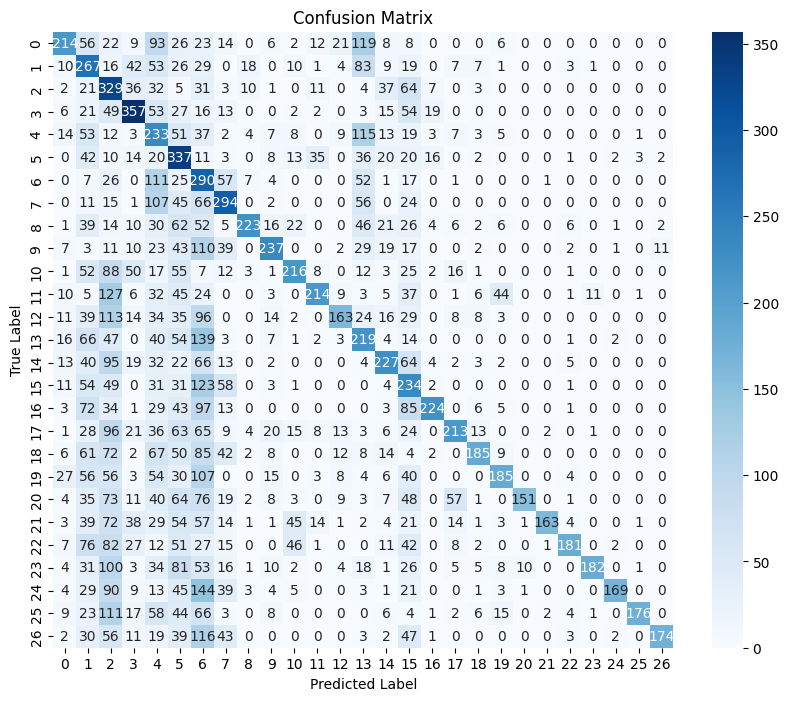

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# create and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB dat

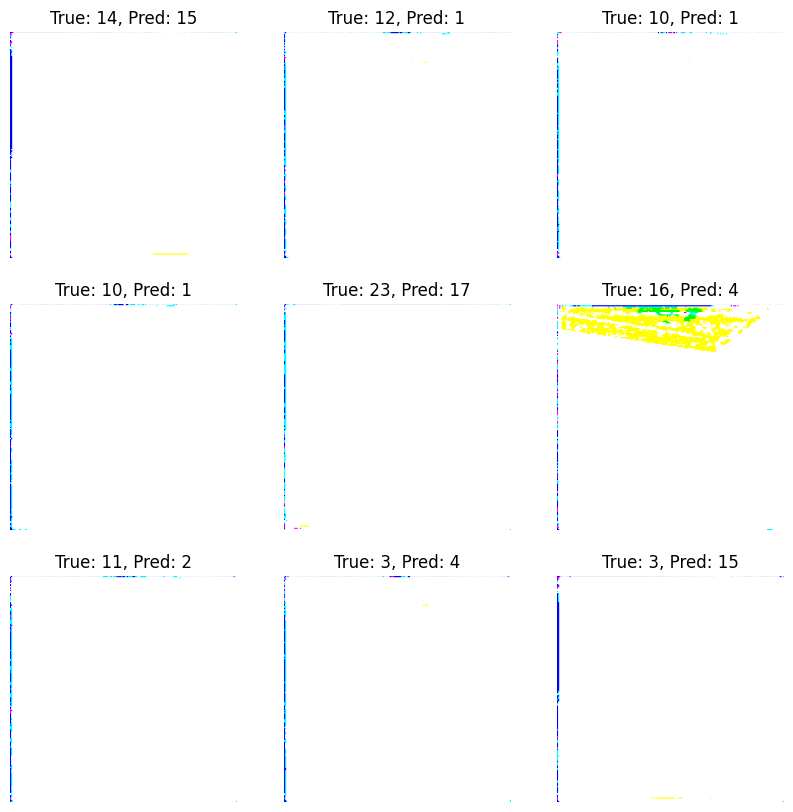

In [ ]:

misclassified_indices = np.where(y_pred_classes != y_true)[0]
num_examples = min(9, len(misclassified_indices))  # Show up to 9 examples

plt.figure(figsize=(10, 10))

for i, idx in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")  # Adjust if using RGB images
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis("off")

plt.show()


Alphabet landmark Results

In [2]:
labels_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "space"]


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import pickle

# load the trained model
model = tf.keras.models.load_model('Mediapipe_Alphabet.h5')

# load the hand landmarks data from the pickle file
with open('hand_landmarks_data.pickle', 'rb') as f:
    dataset = pickle.load(f)

data = np.array(dataset['data'])
labels = dataset['labels']

# define the labels list
labels_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "space"]

#label encoding for categorical labels 
label_encoder = LabelEncoder()
label_encoder.fit(labels_list)  # fit them

# encode labels
labels_encoded = label_encoder.transform(labels)  # convert to rgb

# normalise the data (same as during training)
data_normalized = data / np.max(data)  

# make predictions using the trained model
y_pred = model.predict(data_normalized)

# convert predictions to class labels (indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# gnerate the classification report (Precision, Recall, F1-Score, Accuracy)
report = classification_report(labels_encoded, y_pred_classes, target_names=labels_list, digits=4)

print("Classification Report:")
print(report)

# save the classification report to a text file
with open('classification_report_Landmarks_Alphabet.txt', 'w') as f:
    f.write(report)


2039/2039 [==============================] - 2s 771us/step
Classification Report:
              precision    recall  f1-score   support

           A     0.9817    0.9732    0.9774      2310
           B     0.9934    0.9973    0.9954      2257
           C     0.9885    0.9987    0.9936      2243
           D     0.9913    0.9752    0.9832      2583
           E     0.9915    0.9869    0.9892      2365
           F     0.9905    0.9952    0.9929      2939
           G     0.9922    0.9942    0.9932      2574
           H     0.9927    0.9903    0.9915      2481
           I     0.9951    0.9747    0.9848      2488
           J     0.9977    0.9861    0.9919      2656
           K     0.9956    0.9945    0.9951      2747
           L     0.9988    0.9985    0.9987      2603
           M     0.8626    0.9622    0.9097      1905
           N     0.9876    0.8167    0.8940      1560
           O     0.9688    0.9979    0.9831      2361
           P     0.9845    0.9896    0.9871      2120

2039/2039 [==============================] - 2s 814us/step


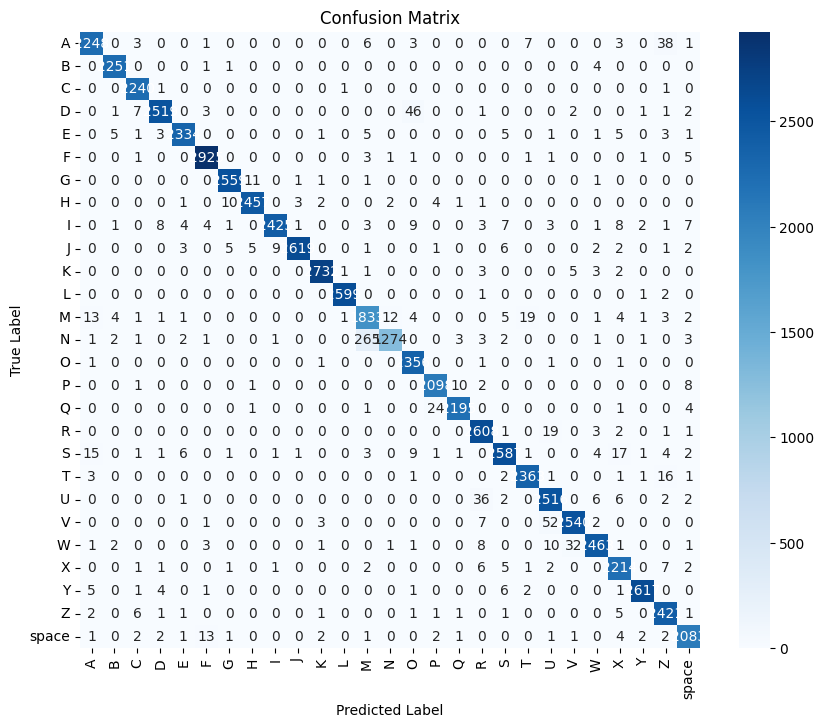

Confusion Matrix:
[[2248    0    3    0    0    1    0    0    0    0    0    0    6    0
     3    0    0    0    0    7    0    0    0    3    0   38    1]
 [   0 2251    0    0    0    1    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    4    0    0    0    0]
 [   0    0 2240    1    0    0    0    0    0    0    0    1    0    0
     0    0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    1    7 2519    0    3    0    0    0    0    0    0    0    0
    46    0    0    1    0    0    0    2    0    0    1    1    2]
 [   0    5    1    3 2334    0    0    0    0    0    1    0    5    0
     0    0    0    0    5    0    1    0    1    5    0    3    1]
 [   0    0    1    0    0 2925    0    0    0    0    0    0    3    1
     1    0    0    0    0    1    1    0    0    0    1    0    5]
 [   0    0    0    0    0    0 2559   11    0    1    1    0    1    0
     0    0    0    0    0    0    0    0    1    0    0    0    0]
 [

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('Mediapipe_Alphabet.h5')

with open('hand_landmarks_data.pickle', 'rb') as f:
    dataset = pickle.load(f)


data = np.array(dataset['data'])
labels = dataset['labels']

# define labels
labels_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "space"]

# label encoding for categorical labels 
label_encoder = LabelEncoder()
label_encoder.fit(labels_list)  # fit on A-Z and space

labels_encoded = label_encoder.transform(labels)  # Convert labels to integers 

# normalise the data (same as during training)
data_normalized = data / np.max(data)  

# make predictions using the trained model
y_pred = model.predict(data_normalized)

# convert predictions to class labels (indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# generate the confusion matrix
cm = confusion_matrix(labels_encoded, y_pred_classes)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_list, yticklabels=labels_list)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# load the trained model
model = tf.keras.models.load_model('Mediapipe_Alphabet.h5')

# load the hand landmarks data from the pickle file
with open('hand_landmarks_data.pickle', 'rb') as f:
    dataset = pickle.load(f)

data = np.array(dataset['data'])
labels = dataset['labels']

labels_list = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "space"]

label_encoder = LabelEncoder()
label_encoder.fit(labels_list)  

# Encode labels
labels_encoded = label_encoder.transform(labels) 
data_normalized = data / np.max(data)  

y_pred = model.predict(data_normalized)

y_pred_classes = np.argmax(y_pred, axis=1)

misclassified_indices = np.where(y_pred_classes != labels_encoded)[0]

print(f"Number of misclassified samples: {len(misclassified_indices)}")
for idx in misclassified_indices[:10]:  
    true_label = labels[idx]
    predicted_label = label_encoder.inverse_transform([y_pred_classes[idx]])[0]
    print(f"Index: {idx}, True Label: {true_label}, Predicted Label: {predicted_label}")

for idx in misclassified_indices[:10]:
    print(f"Landmarks for misclassified sample {idx}: {data[idx]}")


2039/2039 [==============================] - 2s 804us/step
Number of misclassified samples: 1164
Index: 144, True Label: A, Predicted Label: Z
Index: 1295, True Label: A, Predicted Label: Z
Index: 1310, True Label: A, Predicted Label: M
Index: 1314, True Label: A, Predicted Label: Z
Index: 1435, True Label: A, Predicted Label: M
Index: 1440, True Label: A, Predicted Label: O
Index: 1442, True Label: A, Predicted Label: Z
Index: 1445, True Label: A, Predicted Label: O
Index: 1447, True Label: A, Predicted Label: F
Index: 1448, True Label: A, Predicted Label: O
Landmarks for misclassified sample 144: [0.45713806 0.70114911 0.63005507 0.62737381 0.77938247 0.50401777
 0.84279275 0.40157169 0.83809489 0.33936617 0.78211582 0.6783036
 0.78807151 0.46914324 0.75649065 0.39723861 0.73953599 0.39207253
 0.66211867 0.71834749 0.66701102 0.45201027 0.64983374 0.41627112
 0.64111978 0.46220273 0.52473944 0.72762275 0.52969998 0.48733053
 0.52787244 0.46935737 0.52453715 0.51127535 0.3876555  0.70